# 概率函数
- **函数类别**
- d density 密度函数
- p distribution function 分布函数
- q quantile function 分位数函数
- r random 生成随机数
- **分布类别**
- Beta分布  beta
- 二项分布  binom
- 柯西分布  cauchy
- 非中心卡方分布  chisq
- 指数分布  exp
- F分布  f
- Gamma分布  gamma
- 几何分布  geom
- 超几何分布  hype
- 对数正态分布  lnorm
- Logistic分布  logis 
- 多项分布  multinom 
- 负二项分布  nbinom 
- 正态分布  norm 
- 泊松分布  pois 
- Wilcoxon符号秩分布  signrank 
- t分布  t 
- 均匀分布  unif 
- Weibull分布  weibull 
- Wilcoxon秩和分布  wilcox 

In [8]:
# 将-3,3 分割成30份
x <- pretty(c(-3,3), 30)
# 密度+正态
y <- dnorm(x)
print("正态分布密度函数:略")
# plot(x,y)
# 分布+正态
y <- pnorm(x)
print("正态分布分布函数:略")
#plot(x,y)
# 分位数+正态
print("正态分布99%分位点")
qnorm(.99,mean=0,sd=1)
# 随机数+正态
x <- rnorm(1000,mean=0,sd=1)
print("正态分布均值")
mean(x)
print("正态分布标准差")
sd(x)

[1] "正态分布密度函数:略"
[1] "正态分布分布函数:略"
[1] "正态分布99%分位点"


[1] 2.326348

[1] "正态分布均值"


[1] -0.05029033

[1] "正态分布标准差"


[1] 0.9875372

In [9]:
# set.seed()指定随机种子
set.seed(1024)
runif(2)

[1] 0.2180892 0.9876342

In [10]:
# 生成多元正态数据 
library(MASS)
options(digits=3)
set.seed(1234)
mean <- c(230.7,146.7,3.6)
sigma <- matrix(c(15360,6721.2,-47.1,
                  6721.2,4700.9,-16.5,
                  -47.1,-16.5,0.3),nrow=3,ncol=3)
mydata <- mvrnorm(500,mean,sigma)
mydata <- as.data.frame(mydata)
names(mydata) <- c("y","x1","x2")
dim(mydata)
head(mydata,n=10)

[1] 500   3

y,x1,x2
98.8,41.3,3.43
244.5,205.2,3.80
375.7,186.7,2.51
-59.2,11.2,4.71
313.0,111.0,3.45
288.8,185.1,2.72
134.8,165.0,4.39
171.7,97.4,3.64
167.3,101.0,3.50
121.1,94.5,4.10


# 样本检验

In [11]:
# 检验一个数据集的分布
eruptions <- faithful$eruptions
summary(eruptions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.60    2.16    4.00    3.49    4.45    5.10 

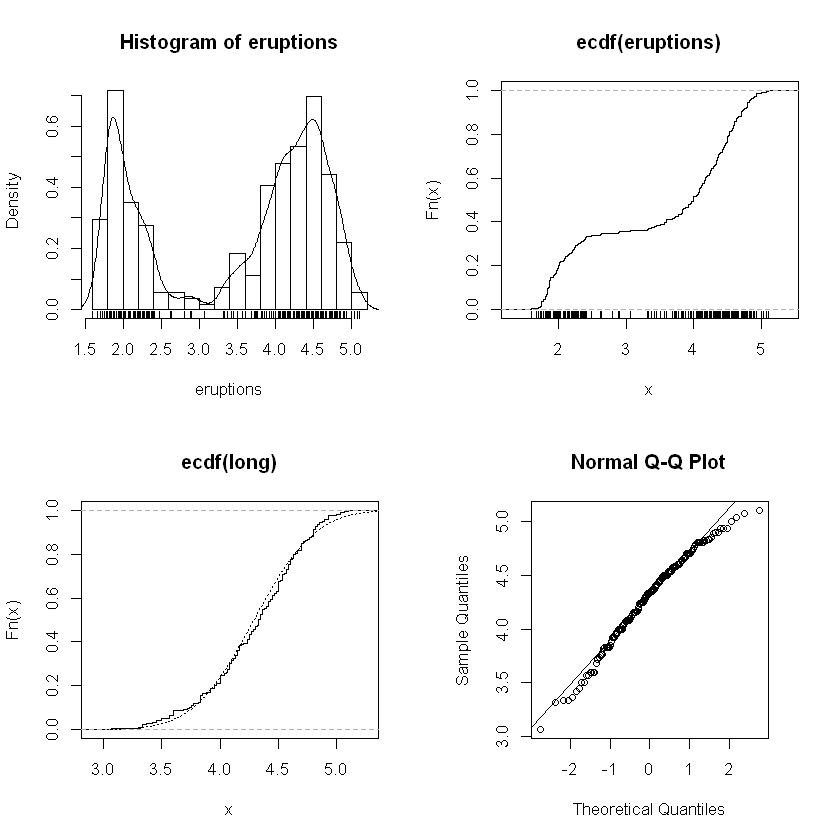

In [12]:
par(mfrow=c(2,2))
# 绘制密度图
hist(eruptions, seq(1.6, 5.2, 0.2), prob=TRUE)
lines(density(eruptions,bw=0.1))
rug(eruptions)
# 绘制经验累积分布函数
plot(ecdf(eruptions), do.points=FALSE, verticals=TRUE)
rug(eruptions)
# 用正态分布拟合火山爆发三分钟后的情况
long <- eruptions[eruptions > 3]
plot(ecdf(long), do.points=FALSE, verticals=TRUE)
lines(seq(3, 5.4, 0.01),pnorm(seq(3, 5.4, 0.01),
                             mean=mean(long),sd=sd(long)),lty=3)
# QQplot,正态分布
par(pty="s") # 设置一个方形的图形区域
qqnorm(long); qqline(long)

In [13]:
# R提供了正规的正态性检验方法
# Shapiro-Wilk 检验
shapiro.test(long)
# Kolmogorov-Smirnov 检验
ks.test(long, "pnorm", mean = mean(long), sd = sqrt(var(long)))


	Shapiro-Wilk normality test

data:  long
W = 1, p-value = 0.01


Warning message in ks.test(long, "pnorm", mean = mean(long), sd = sqrt(var(long))):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  long
D = 0.07, p-value = 0.4
alternative hypothesis: two-sided


In [14]:
# 单样本和双样本检验
A <- c(79.98,80.04,80.02,80.04,80.03,80.03,80.04,79.97,
       80.05,80.03,80.02,80.00,80.02)
B <- c(80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97)
# 非配对 t-检验
t.test(A,B)
# F检验来确定方差的齐性情况
var.test(A, B)
# 传统的假设方差齐性的t-检验
t.test(A, B, var.equal=TRUE)
# 双样本的Wilcoxon (或者Mann-Whitney)检验
wilcox.test(A, B)
# Kolmogorov-Smirnov 检验是对两个经验累计概率分布间的最大垂直距离进行统计
ks.test(A, B)


	Welch Two Sample t-test

data:  A and B
t = 3, df = 10, p-value = 0.007
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0139 0.0702
sample estimates:
mean of x mean of y 
       80        80 



	F test to compare two variances

data:  A and B
F = 0.6, num df = 10, denom df = 7, p-value = 0.4
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.125 2.105
sample estimates:
ratio of variances 
             0.584 



	Two Sample t-test

data:  A and B
t = 3, df = 20, p-value = 0.003
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0167 0.0673
sample estimates:
mean of x mean of y 
       80        80 


Warning message in wilcox.test.default(A, B):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 90, p-value = 0.007
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(A, B):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  A and B
D = 0.6, p-value = 0.06
alternative hypothesis: two-sided


# 独立性检验

In [9]:
# 卡方独立性检验
library(vcd)
ar <- Arthritis
# treatment和imporved不独立
table1 <- xtabs(~Treatment+Improved,data=ar)
chisq.test(table1)


	Pearson's Chi-squared test

data:  table1
X-squared = 13.055, df = 2, p-value = 0.001463


In [10]:
# sex和imporved独立
table2 <- xtabs(~Improved+Sex,data=ar)
chisq.test(table2)

Warning message in chisq.test(table2):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table2
X-squared = 4.8407, df = 2, p-value = 0.08889


In [11]:
# fisher精确检验f
fisher.test(table1)


	Fisher's Exact Test for Count Data

data:  table1
p-value = 0.001393
alternative hypothesis: two.sided


In [13]:
fisher.test(table2)


	Fisher's Exact Test for Count Data

data:  table2
p-value = 0.1094
alternative hypothesis: two.sided


In [14]:
# Cochran—Mantel—Haenszel卡方检验
table3 <- xtabs(~Treatment+Improved+Sex,data=ar)
mantelhaen.test(table3)
# 结果表明，患者接受的治疗与得到的改善在性别的每一水平下并不独立


	Cochran-Mantel-Haenszel test

data:  table3
Cochran-Mantel-Haenszel M^2 = 14.632, df = 2, p-value = 0.0006647


In [15]:
# 计算相关性度量
assocstats(table1)

                    X^2 df  P(> X^2)
Likelihood Ratio 13.530  2 0.0011536
Pearson          13.055  2 0.0014626

Phi-Coefficient   : NA 
Contingency Coeff.: 0.367 
Cramer's V        : 0.394 

# 相关

In [16]:
# cor(x,use= , method= )
# use: all.obs,everything,complete.obs(行删除),pairwise.complete.obs(成对删除)
# method: pearson,spearman,kendall
states <- state.x77[,1:6]
# 方差与协方差
cov(states)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad
Population,19931683.7588,571229.7796,292.8679592,-407.8424612,5663.523714,-3551.509551
Income,571229.7796,377573.3061,-163.7020408,280.6631837,-521.894286,3076.768980
Illiteracy,292.8680,-163.7020,0.3715306,-0.4815122,1.581776,-3.235469
Life Exp,-407.8425,280.6632,-0.4815122,1.8020204,-3.869480,6.312685
Murder,5663.5237,-521.8943,1.5817755,-3.8694804,13.627465,-14.549616
HS Grad,-3551.5096,3076.7690,-3.2354694,6.3126849,-14.549616,65.237894


In [17]:
# pearson相关系数
cor(states)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad
Population,1.00000000,0.2082276,0.1076224,-0.06805195,0.3436428,-0.09848975
Income,0.20822756,1.0000000,-0.4370752,0.34025534,-0.2300776,0.61993232
Illiteracy,0.10762237,-0.4370752,1.0000000,-0.58847793,0.7029752,-0.65718861
Life Exp,-0.06805195,0.3402553,-0.5884779,1.00000000,-0.7808458,0.58221620
Murder,0.34364275,-0.2300776,0.7029752,-0.78084575,1.0000000,-0.48797102
HS Grad,-0.09848975,0.6199323,-0.6571886,0.58221620,-0.4879710,1.00000000


In [18]:
# Population与其他变量的spearman等级相关系数
cor(states,states[,"Population"],method="spearman")

Population,1.0000000
Income,0.1246098
Illiteracy,0.3130496
Life Exp,-0.1040171
Murder,0.3457401
HS Grad,-0.3833649


In [19]:
# 相关性的显著性实验
# cor.test()函数对单个的Pearson、Spearman和Kendall相关系数进行检验
# cor.test(x,y,alternative= , method= )
# alternative则用来指定进行双侧检验或单侧检验# "two.side"、"less"或"greater"
cor.test(states[,"Life Exp"],states[,"Murder"])
# 原假设"两者的相关度为0",P值2.26e-11
# murder和life exp的相关度的95%置信区间是[-0.8700837,-0.6420442]


	Pearson's product-moment correlation

data:  states[, "Life Exp"] and states[, "Murder"]
t = -8.6596, df = 48, p-value = 2.26e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8700837 -0.6420442
sample estimates:
       cor 
-0.7808458 


# 方差分析（ANOVA）

In [57]:
# 单因素方差分析
attach(multcomp::cholesterol)
table(trt)

trt
 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

In [58]:
aggregate(response, by=list(trt), FUN=mean)

Group.1,x
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


In [59]:
aggregate(response, by=list(trt), FUN=sd)

Group.1,x
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


In [60]:
fit <- aov(response ~ trt)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

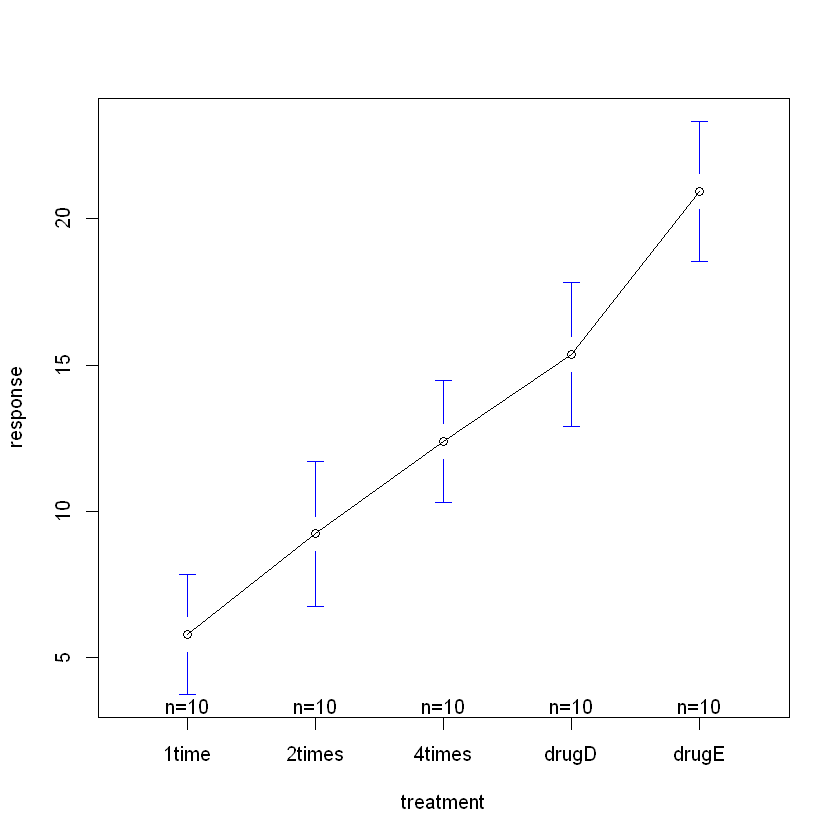

In [61]:
gplots::plotmeans(response ~ trt, xlab="treatment",
                 ylab="response")
detach(multcomp::cholesterol)
# 95%置信区间

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633


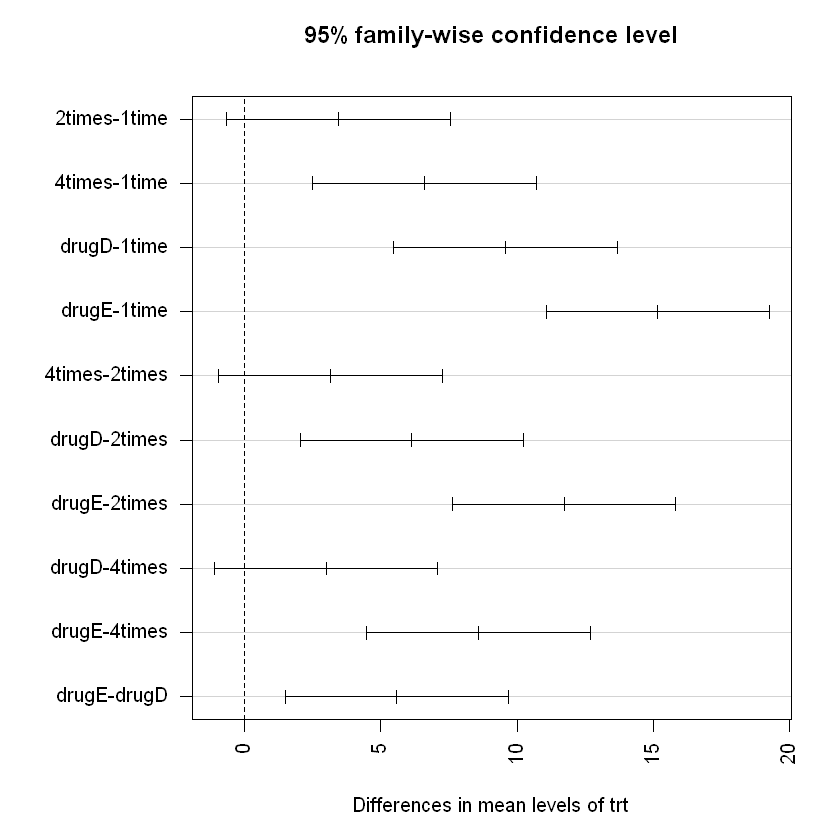

In [62]:
# 多重比较
TukeyHSD(fit)
par(las=2)
par(mar=c(5,8,4,2))
plot(TukeyHSD(fit))

In [63]:
# 评估检验的假设条件
# 方差齐性检验:Bartlett检验
bartlett.test(response ~ trt, 
              data=multcomp::cholesterol)
# 表明五组的方差并没有显著不同


	Bartlett test of homogeneity of variances

data:  response by trt
Bartlett's K-squared = 0.57975, df = 4, p-value = 0.9653


- 未看:R实战:p231-244
- 单因素协方差分析
- 单因素协方差分析
- 重复测量方差分析
- 多元方差分析